# From Part 3.1 BRING ALL TOGETHER

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

from torchvision.datasets import MNIST

from torchvision import transforms

from torch.utils.data import DataLoader

import torch.nn.functional as F

from torch.utils.data import random_split

In [2]:
batch_size = 100
img_size = 28*28
n_classes = 10
lr = 1e-4

In [3]:
train_data = MNIST( root='~/Developer/PyTorch_YouTube/DATA/', train = True, transform = transforms.ToTensor() )
print('Training Data = ', len(train_data))

test_data = MNIST( root ='~/Developer/PyTorch_YouTube/DATA/', train = False, transform = transforms.ToTensor())
print('Testing Data = ', len(test_data))

Training Data =  60000
Testing Data =  10000


In [4]:
train_batch = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_batch = DataLoader(dataset= test_data, batch_size=batch_size)

# can be used only in for loop

In [5]:
train_set, val_set = random_split(train_data, [50000, 10000])

print(len(train_set), len(val_set))

50000 10000


# Train the Model
for epoch in range(num_epochs):
    # Training phase
    for batch in test_set:
         Generate predictions
         Calculate loss
         Compute gradients
         Update weights
         Reset gradients
    
    # Validation phase
    for batch in val_set:
         Generate predictions
         Calculate loss
         Calculate metrics (accuracy etc.)
     Calculate average validation loss & metrics
    
     Log epoch, loss & metrics for inspection

## Define Regression, Opti and Loss model

In [6]:
model = nn.Linear(img_size, n_classes)

cross_loss = nn.CrossEntropyLoss() # computes SoftMax internally

opti = torch.optim.SGD(model.parameters(), lr = lr)        

## Train the Models

In [13]:
n_epoch = 25

total_step = len(train_batch)  # 60,000 data size & 100 batches

for epoch in range(n_epoch):
    for i, (image, label) in enumerate(train_batch):
        
        # Flatten the image
        img = image.reshape(-1, img_size)
        
        # Forward Pass
        output = model(img)
        loss = cross_loss(output, label)
        
        # Backward Pass
        opti.zero_grad()
        loss.backward()
        opti.step() # performs a parameter update w -= w.grad*lr
        
        if (i+1)%200 ==0:
            print('Epoch {}/{}, Step {}/{}, Loss: {:.4f}'
                 .format(epoch+1, n_epoch, i+1, total_step, loss.item()))

            

Epoch 1/10, Step 200/600, Loss: 1.4856
Epoch 1/10, Step 400/600, Loss: 1.4326
Epoch 1/10, Step 600/600, Loss: 1.4968
Epoch 2/10, Step 200/600, Loss: 1.4480
Epoch 2/10, Step 400/600, Loss: 1.4697
Epoch 2/10, Step 600/600, Loss: 1.4418
Epoch 3/10, Step 200/600, Loss: 1.4471
Epoch 3/10, Step 400/600, Loss: 1.3361
Epoch 3/10, Step 600/600, Loss: 1.3758
Epoch 4/10, Step 200/600, Loss: 1.3575
Epoch 4/10, Step 400/600, Loss: 1.3642
Epoch 4/10, Step 600/600, Loss: 1.4752
Epoch 5/10, Step 200/600, Loss: 1.3548
Epoch 5/10, Step 400/600, Loss: 1.3219
Epoch 5/10, Step 600/600, Loss: 1.3321
Epoch 6/10, Step 200/600, Loss: 1.3464
Epoch 6/10, Step 400/600, Loss: 1.2775
Epoch 6/10, Step 600/600, Loss: 1.2944
Epoch 7/10, Step 200/600, Loss: 1.3248
Epoch 7/10, Step 400/600, Loss: 1.3247
Epoch 7/10, Step 600/600, Loss: 1.3595
Epoch 8/10, Step 200/600, Loss: 1.3187
Epoch 8/10, Step 400/600, Loss: 1.2644
Epoch 8/10, Step 600/600, Loss: 1.2710
Epoch 9/10, Step 200/600, Loss: 1.2893
Epoch 9/10, Step 400/600,

## Test the Model

In [14]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_batch: # test loader can be used in a for loop
        img = images.reshape(-1, img_size)
        
        output = model(img)
        
        _, predicted = torch.max(output.data, 1)  # check maximum along rows
        
        correct += (predicted == labels).sum()
        total += labels.size(0)
    
    print('Accuracy = {} %'.format(100*correct//total))

Accuracy = 80 %


# Testing with Individual Images

At beginning we converted dataset compatiable to PyTorch = transforms.ToTensor()\
Therefore we have to undo the effect = use **transforms.ToPILImage()(img)**\
We will use **TEST Set**

In [27]:
def flat_and_train(img, model):
    img = img.reshape(-1, img.shape[1]*img.shape[2])
    
    output = model(img)
    
    _, guess = torch.max(output.data, 1)
    
    return guess

tensor([8])


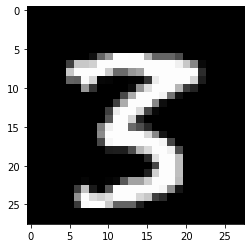

In [44]:
img, label = test_data[991]

plt.imshow(transforms.ToPILImage()(img), cmap = 'gray')
prediction = flat_and_train(img, model)

print(prediction)

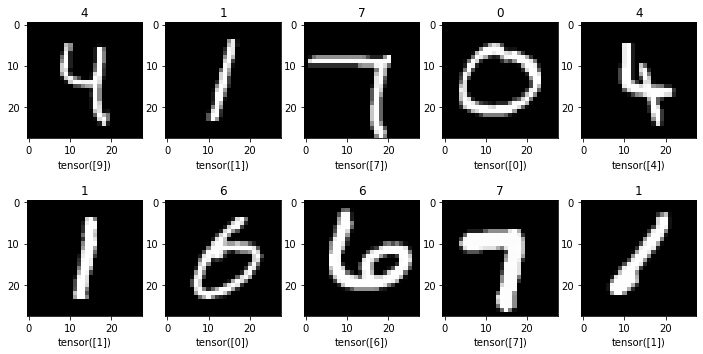

In [63]:
run = range(100)
fig, axs = plt.subplots(2,5, figsize=(12, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(10):

    choice = np.random.choice(range(1000))
    img, label = test_data[choice]

    prediction = flat_and_train(img, model)

    axs[i].imshow(transforms.ToPILImage()(img), cmap = 'gray')
    axs[i].set_xlabel(str(prediction))
    axs[i].set_title(str(label))


    

In [54]:
print(label)

1
